# Consumer Complaint Analysis

In [1]:
import pandas as pd
import matplotlib as plot
%matplotlib inline

In [2]:
data = pd.read_csv('Consumer_Complaints.csv')

/home/user/venv1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Companies producing more number of Products

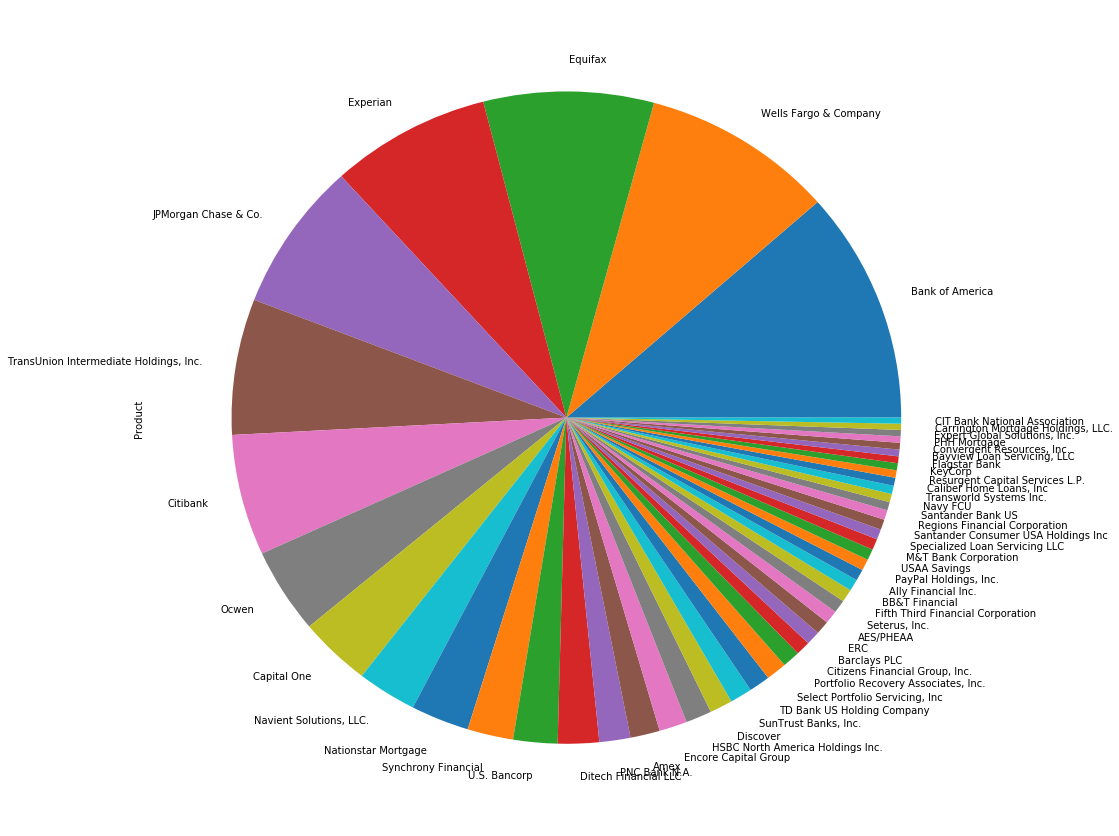

In [29]:
(data.groupby('Company').Product.agg('count').sort_values(ascending = False)[0:50]).plot(kind='pie',figsize=(15,15))

## Companies with complaints morethan 10000 

In [7]:
total_comp_comp = data.groupby('Company')['Complaint ID'].agg('count').reset_index()

/home/user/venv1/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


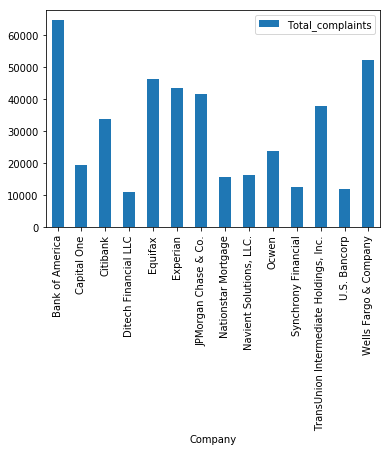

In [8]:
category3 = total_comp_comp[total_comp_comp['Complaint ID'] >= 10000]
category3.rename(columns={'Complaint ID':'Total_complaints'},inplace = True)
category3.plot(kind='bar',x = 'Company')

## Number of complaints in each state

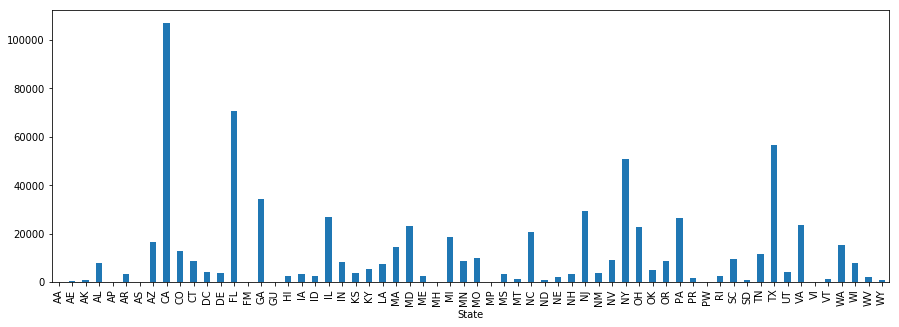

In [33]:
total_comp_state = data.groupby('State')['Complaint ID'].agg('count').plot(kind = 'bar',figsize = (15,5))
total_comp_state

## Complaints of each company in each state

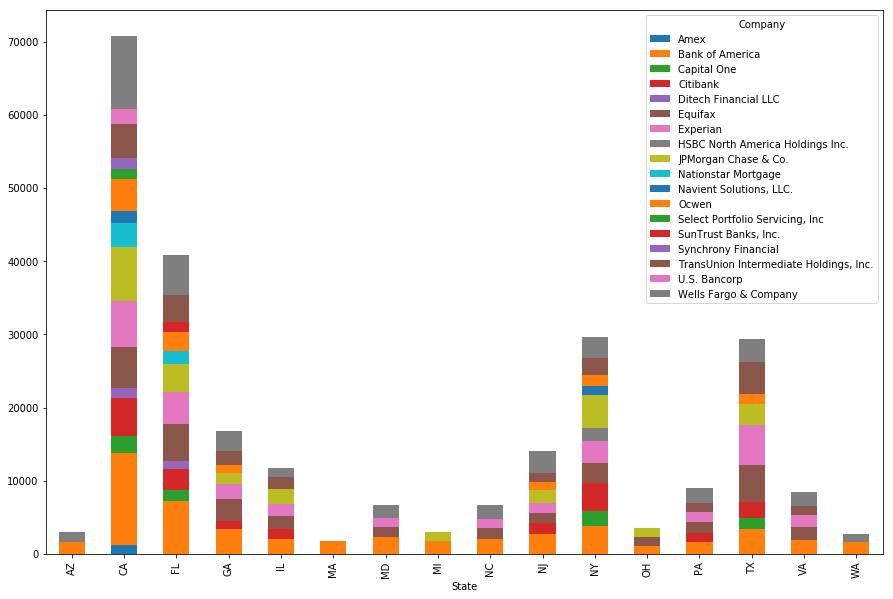

In [15]:
state_Complaint = data.groupby(['State','Company'])['Complaint ID'].agg('count')
top_complaints = state_Complaint.sort_values(ascending = False)[0:100]
df = top_complaints.unstack(level=-1, fill_value=0)
df.plot(kind = 'bar',stacked = True,figsize = (15,10));

## Total compalints vs Timely reacted and not reacted

In [16]:
timely_responded = data[data['Timely response?'] =='Yes']
df_yes = pd.merge(category3,timely_responded,how='inner',on = ['Company'])

In [17]:
timely_not_responded = data[data['Timely response?'] =='No']
df_no = pd.merge(category3,timely_not_responded,how='inner',on = ['Company'])

In [20]:
x =df_yes.groupby('Company')['Complaint ID'].agg('count').sort_values(ascending = False).reset_index()
x.rename(columns={'Complaint ID':'Timely_responded_complaints'},inplace = True)

In [19]:
y = df_no.groupby('Company')['Complaint ID'].agg('count').sort_values(ascending=True).reset_index()
y.rename(columns={'Complaint ID':'Timely_not_responded_complaints'},inplace = True)

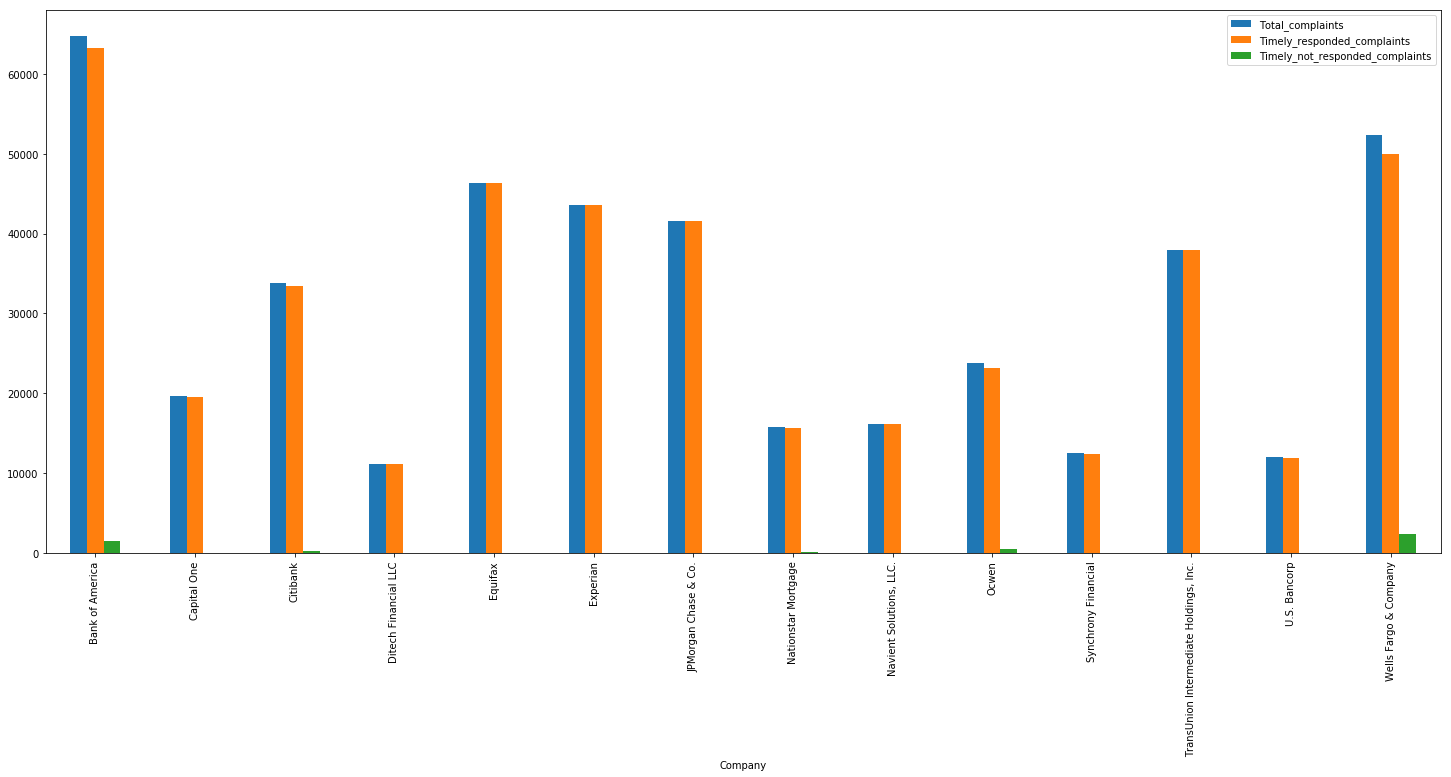

In [21]:
final_df = pd.merge(pd.merge(category3,x,on='Company'),y,on='Company')
final_df.set_index('Company',inplace=True)
final_df.plot(kind='bar',figsize=(25,10))

## Companies satisfied their consumers without any disputes from them

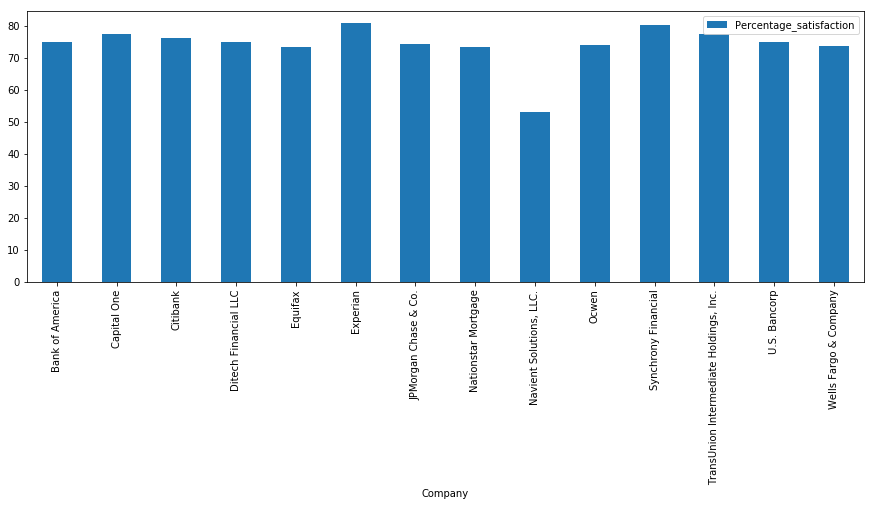

In [68]:
not_responded_df = data[data['Consumer disputed?'] == 'No']
top_50 = not_responded_df.groupby('Company')['Complaint ID'].agg('count').sort_values(ascending = False)[0:14]
top_50 = (top_50.reset_index()).rename(columns={'Complaint ID':'Satisfied_complaints'})
top_50 = pd.merge(category3,top_50,how='inner',on = ['Company'])
top_50['Percentage_satisfaction'] = (top_50.Satisfied_complaints/top_50.Total_complaints)*100
top_50.set_index('Company',inplace=True)
top_50.plot.bar(y='Percentage_satisfaction',figsize=(15,5))